# Analisando Dados de Cirurgias no DF

Com base no arquivo CSV disponível no site de Dados Abertos do GDF vamos analisar os dados de cirurgias eletivas e de emergência realizadas no DF em Janeiro de 2017.

Como obter os dados:
- Ir no Dados Abertos do DF, escolher saúde, escolher cirurgias

Arquivo: sih-janeiro-2017-cirurgias-eletiva-e-emergencia.csv

In [1]:
# Importando a biblioteca
import pandas as pd

# Como o arquivo CSV tem muitas colunas e não nos interessamos por todas, vamos carregar apenas as colunas que nos interessam
# 3 - Hospital, 6 - Municipio, 7 - Complexidade, 8 - Carater Atendimento, 12 - Sub Grupo Procedimento, 14 - Procedimento

# Carregando o arquivo csv para um dataframe
# Informamos o separador, o encoding e as colunas que iremos carregar
# Lembrando que cp1252 é o encoding padrão para arquivos salvos do Excel
df = pd.read_csv('sih-janeiro-2017-cirurgias-eletiva-e-emergencia.csv', sep=';', encoding='cp1252', usecols=[3, 6, 7, 8, 12, 14])

# Mudando o nome das colunas para um nome mais intuitivo
# Usamos uma lista com o novo nome das colunas, na ordem em que elas aparecem no DataFrame
df.columns = ['Hospital', 'Municipio', 'Complexidade', 'Carater Atendimento', 'Sub Grupo Procedimento', 'Procedimento']

# Exibindo apenas as primeiras linhas
df.head(2)

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA


In [2]:
# O pandas consegue mostrar um resumo quantitativo dos dados contidos no dataframe
df.describe()

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
count,4862,4862,4862,4862,4862,4862
unique,16,11,2,4,16,495
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,735,1923,4353,3794,1539,1060


In [3]:
# É possível obter informações de cada coluna separadamente
# Vamos verificar os valores únicos da coluna de hospitais
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)

In [4]:
# Podemos referenciar as colunas como campos, diretamente no DataFrame, mas somente aqueles nomeados com
# uma única palavra, sem espaços
# Vamos contar a qtde de cirurgias de cada hospital
df.Hospital.value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

In [5]:
# Vamos olhar agora o subgrupo
df['Sub Grupo Procedimento'].value_counts()

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

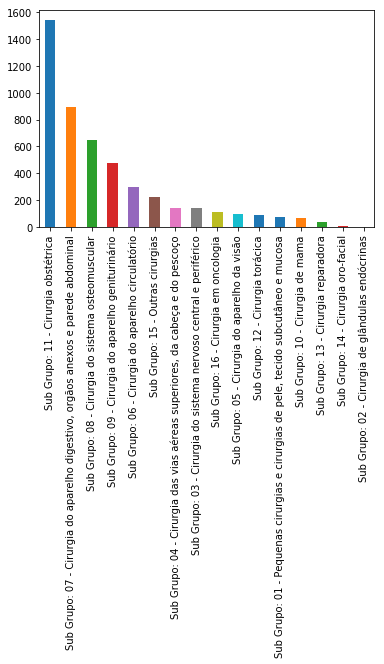

In [6]:
# Podemos plotar o gráfico de barras mostrando os tipos de cirurgia

# Sempre precisamos informar que o gráfico deve ser mostrado no notebook
# em que estamos trabalhando
%matplotlib inline

df['Sub Grupo Procedimento'].value_counts().plot.bar()

In [7]:
# Podemos criar subconjuntos dos dados para facilitar a análise
# E esses subconjuntos podem ser novos DataFrames
# Usamos alguma condição/teste para determinar como o subconjunto será montado

# Vamos selecionar apenas os procedimentos realizados no Hopital de Base
df_hospbase = df[df['Hospital'] == '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL']

df_hospbase.head()

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
4,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA
5,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 06 - Cirurgia do aparelho circulatório,IMPLANTAÇÃO DE CATETER DE LONGA PERMANÊNCIA SE...
6,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 06 - Cirurgia do aparelho circulatório,TRATAMENTO CIRURGICO DE LESOES VASCULARES TRAU...


In [8]:
# Agora, considerando apenas as cirurgias no Hospital de Base, vamos verificar a qtde de cada procedimento
df_hospbase['Procedimento'].value_counts()

TRATAMENTO C/ CIRURGIAS MULTIPLAS                                                                   47
TRAQUEOSTOMIA                                                                                       28
DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO / PLEURA / RAQUE                                       26
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                                           23
IMPLANTE DE MARCAPASSO DE CAMARA DUPLA TRANSVENOSO                                                  21
TRATAMENTO CIRURGICO DE HEMATOMA SUBDURAL CRONICO                                                   18
AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES                                                    17
TROCA DE GERADOR DE MARCAPASSO DE CAMARA DUPLA                                                      14
FACOEMULSIFICACAO C/ IMPLANTE DE LENTE INTRA-OCULAR DOBRAVEL                                        12
ANGIOPLASTIA CORONARIANA C/ IMPLANTE DE DOIS STENTS                      

In [9]:
# Como exemplo, vamos verificar apenas as cirurgias que envolveram amputação
# Como em alguns casos amputação está escrito com acento e em outros não, vamos usar um pedaço da palavra
df_hospbase[df_hospbase['Procedimento'].str.contains('AMPUTA')].count()

Hospital                  33
Municipio                 33
Complexidade              33
Carater Atendimento       33
Sub Grupo Procedimento    33
Procedimento              33
dtype: int64

In [10]:
# Já vimos que o procedimento mais realizado no DF é 'PARTO CESARIANO'
# Mas como é a distribuição desse procedimento pelos hospitais?

# Vamos voltar ao nosso DataFrame original, filtrar pelo procedimento
# e criar um novo DataFrame
df_parto_cesariano = df[df['Procedimento'] == 'PARTO CESARIANO']

df_parto_cesariano.head()

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
130,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
131,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
132,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
133,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
141,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO


In [11]:
# Agora podemos contar o número de ocorrências por hospital
df_parto_cesariano['Hospital'].value_counts()

0010480 HOSPITAL REGIONAL DE CEILANDIA                165
2645157 HRPA                                          123
5717515 HRSM                                          110
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB     93
0010502 HRS                                            92
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA           92
0010464 HRAN                                           88
0010529 HRPL                                           79
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA            74
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA             63
0010472 HRG                                            47
0010545 HRBZ                                           34
Name: Hospital, dtype: int64

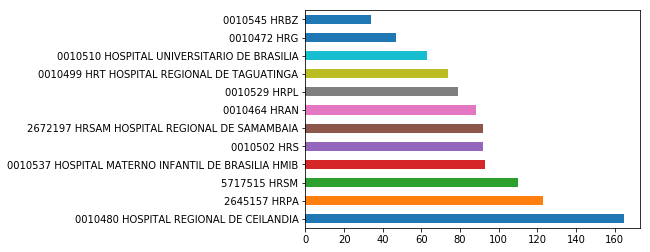

In [12]:
# Agora vamos, novamente, plotar um gráfico de barras desses dados
# mas desta vez usando o gráfico na horizontal
df_parto_cesariano['Hospital'].value_counts().plot.barh()

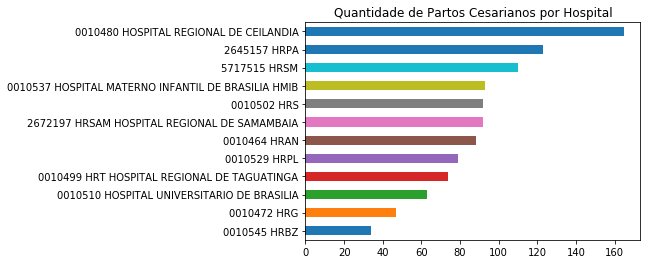

In [13]:
# Podemos melhorar o gráfico ordenando o value_counts() e adicionando um título
df_parto_cesariano['Hospital'].value_counts(ascending=True).plot.barh(title='Quantidade de Partos Cesarianos por Hospital')